In [1]:
import torch
import random
import os

import matplotlib.pyplot as plt

In [2]:
DATA_PATH = '../miniproject_dataset'
train_data_name = 'train_data.pkl'
val_data_name = 'val_data.pkl'

In [3]:
noisy_imgs_1, noisy_imgs_2 = torch.load(os.path.join(DATA_PATH, train_data_name))

In [4]:
noisy_imgs_1.shape, noisy_imgs_2.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000, 3, 32, 32]))

In [5]:
# Get random index
rand_idx = random.randint(0, noisy_imgs_1.shape[0])
rand_idx

28417

In [6]:
# Shuffle images
rand_permutation = torch.randperm(noisy_imgs_1.shape[0])
rand_permutation.shape

torch.Size([50000])

In [7]:
noisy_imgs_1_rand = noisy_imgs_1[rand_permutation][:, :, :]
noisy_imgs_1_rand.shape

torch.Size([50000, 3, 32, 32])

In [8]:
rand_img_1, rand_img_2 = noisy_imgs_1_rand[rand_idx], noisy_imgs_1_rand[rand_idx]

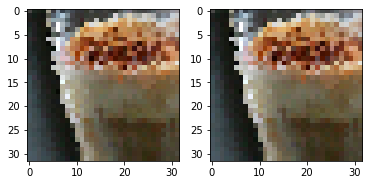

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(rand_img_1.permute(1, 2, 0))
axs[1].imshow(rand_img_2.permute(1, 2, 0))
plt.show()

In [29]:
noisy_imgs, clean_imgs = torch.load(os.path.join(DATA_PATH, val_data_name))
noisy_imgs.shape, clean_imgs.shape

(torch.Size([1000, 3, 32, 32]), torch.Size([1000, 3, 32, 32]))

In [30]:
rand_idx = random.randint(0, noisy_imgs.shape[0])
rand_noisy_img, rand_clean_img = noisy_imgs[rand_idx, :, :, :], clean_imgs[rand_idx, :, :, :]

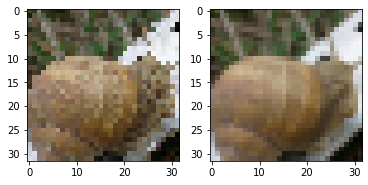

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(rand_noisy_img.permute(1, 2, 0))
axs[1].imshow(rand_clean_img.permute(1, 2, 0))
plt.show()

### Model Testing

In [32]:
from model import Model

model = Model()
model.load_pretrained_model()

Loading pretrained model from /home/yusuf/PycharmProjects/deep-learning-minis/Miniproject_1/bestmodel.pth


In [33]:
model_input = rand_noisy_img.reshape(1, rand_noisy_img.shape[0], rand_noisy_img.shape[1], rand_noisy_img.shape[2])
model_input.shape, model_input.min(), model_input.max()

(torch.Size([1, 3, 32, 32]),
 tensor(0, dtype=torch.uint8),
 tensor(253, dtype=torch.uint8))

In [34]:
pred = model.predict(model_input).cpu()
pred.shape, pred.min(), pred.max()

(torch.Size([1, 3, 32, 32]),
 tensor(0, dtype=torch.uint8),
 tensor(248, dtype=torch.uint8))

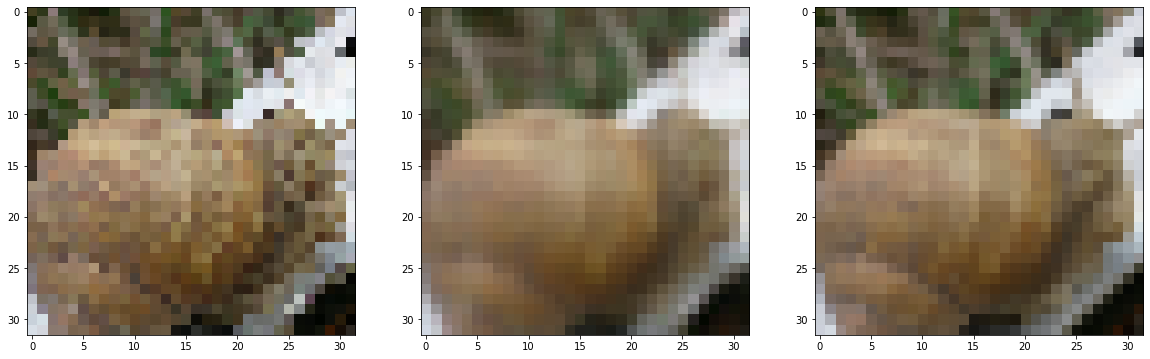

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
axs[0].imshow(model_input[0].permute(1, 2, 0))
axs[1].imshow(pred[0].permute(1, 2, 0))
axs[2].imshow(rand_clean_img.permute(1, 2, 0))
plt.show()